In [109]:
#Import core libs
import re
import random
import math
import matplotlib.pyplot as plt
import datetime
import os
from operator import add

#Import non-core libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats as stats

#Import Visualization libs
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

## Definición de fuente

In [2]:
#Definimos la fuente del archivo (indicar directorio local)
source = "../../DataSets Grandes/properati2.csv"
data = pd.read_csv(source)

## Análisis exploratorio de datos

In [3]:
#Analizamos las columnas
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
#Analizamos la forma
data.shape

(121220, 26)

In [5]:
#Vemos los primeros datos
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [6]:
#Vemos los nulos del dataset
data.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

## Limpieza de datos

In [271]:
df = data.drop(columns = ["operation","country_name","geonames_id","image_thumbnail","properati_url","lat-lon","price_aprox_local_currency","price_aprox_usd"])

In [272]:
df.shape

(121220, 18)

In [273]:
#Guardo una copia del dataset con nulos
df_with_nan = df

In [274]:
df = df.dropna(subset=['price','property_type', "surface_covered_in_m2","surface_total_in_m2"], how='any')

In [275]:
df.shape

(63352, 18)

In [276]:
df = df[df.currency == "USD"]

In [277]:
df.shape

(55795, 18)

In [278]:
price_ol = df["price"].quantile(0.8) + (1.5 * (df["price"].quantile(0.75) - df["price"].quantile(0.25)))

In [279]:
surface_covered_in_m2_ol = df["surface_covered_in_m2"].quantile(0.8) + (1.5 * (df["surface_covered_in_m2"].quantile(0.75) - df["surface_covered_in_m2"].quantile(0.25)))

In [280]:
#Guardo copia para análisis exploratorio de los valores elevados
df_high = df[df["surface_covered_in_m2"] > surface_covered_in_m2_ol]
df_high = df[df["price"] > price_ol]

In [281]:
df = df[df["surface_covered_in_m2"] < surface_covered_in_m2_ol]

In [282]:
df = df[df["price"] < price_ol]

In [283]:
df.shape

(50947, 18)

In [284]:
df_high.shape

(3767, 18)

In [286]:
#Nos quedamos solo con la superficie que guarda relación con la física
df = df[df.surface_covered_in_m2 < df.surface_total_in_m2]

In [287]:
df[df.property_type == "apartment"].isna().sum()

Unnamed: 0                     0
property_type                  0
place_name                     1
place_with_parent_names        0
state_name                     0
lat                         7750
lon                         7750
price                          0
currency                       0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
price_per_m2                   2
floor                      19307
rooms                      12330
expenses                   15815
description                    0
title                          0
dtype: int64

In [288]:
df.shape

(33849, 18)

<AxesSubplot:>

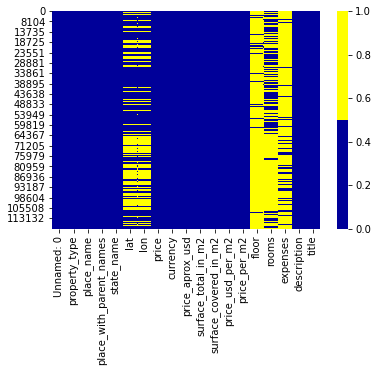

In [253]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [254]:
df.property_type.value_counts()

apartment    21239
house        10384
PH            1985
store          241
Name: property_type, dtype: int64

In [289]:
df_high.property_type.value_counts()

house        1890
apartment    1547
store         315
PH             15
Name: property_type, dtype: int64

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

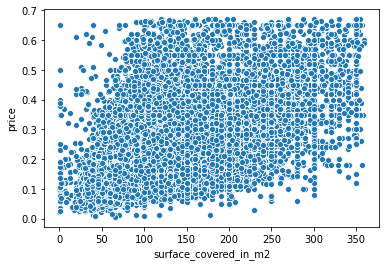

In [290]:
sns.scatterplot(x = "surface_covered_in_m2", y = df.price/1000000, data = df)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

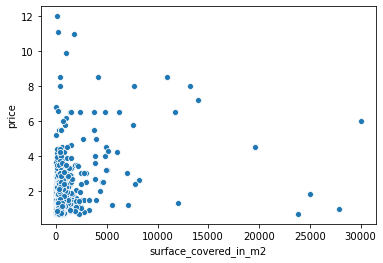

In [294]:
sns.scatterplot(x = "surface_covered_in_m2", y = df_high.price/1000000, data = df_high)

In [295]:
df["price"].max()

670000.0

In [296]:
df_high["price"].max()

12000000.0

In [262]:
#Analizamos los propiedades con los valores más elevados
df[df["price"]==df["price"].max()].sample(5)

,Unnamed: 0,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
17504,17504,house,Capital Federal,|Argentina|Capital Federal|,Capital Federal,NaN,NaN,670000.0,USD,670000.0,800.0,330.0,837.500000,2030.303030,NaN,NaN,NaN,Se trata de una casa muy sÃ³lida construida po...,"Casa 800m² con 2 Plantas, Argentina, Capital F..."
29083,29083,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.573952,-58.422904,670000.0,USD,670000.0,200.0,180.0,3350.000000,3722.222222,NaN,4.0,NaN,Excelente duplex ubicado en una de las mejores...,Sinclair 3100 - Palermo - Capital Federal
61870,61870,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Capital Federal,-34.617719,-58.362056,670000.0,USD,670000.0,129.0,120.0,5193.798450,5583.333333,NaN,3.0,NaN,3 ambientes - Planta muy bien distribuida.Hall...,Espectacular 3 ambientes en Venta -Art María.
10394,10394,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Bs.As. G.B.A. Zona Norte,-34.447361,-58.631426,670000.0,USD,670000.0,890.0,330.0,752.808989,2030.303030,NaN,4.0,NaN,Excelente casa en venta en el barrio cerrado S...,CASA en VENTA en SANTA BÁRBARA Barrio Cerrado
109510,109510,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.562966,-58.443771,670000.0,USD,670000.0,210.0,198.0,3190.476190,3383.838384,NaN,NaN,16000.0,Impecable Piso TOTALMENTE RECICLADO en Virrey...,V. Loreto y Arribeños - Piso - TOTALMENTE RECI...


<AxesSubplot:xlabel='rooms', ylabel='price'>

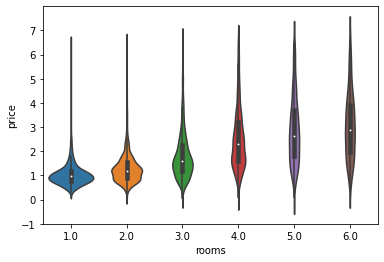

In [264]:
#Analizamos la distribución de los valores de las propiedades del dataset limpio, en relación a la cantidad de rooms
sns.violinplot(df.rooms[df.rooms<7],df.price/100000)

<AxesSubplot:xlabel='rooms', ylabel='price'>

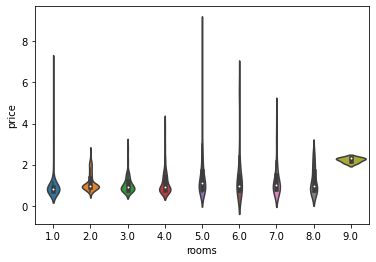

In [298]:
#Analizamos la distribución de los valores de las propiedades más caras en relación a la cantidad de rooms
sns.violinplot(df_high.rooms[df_high.rooms<10],df_high.price/1000000)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

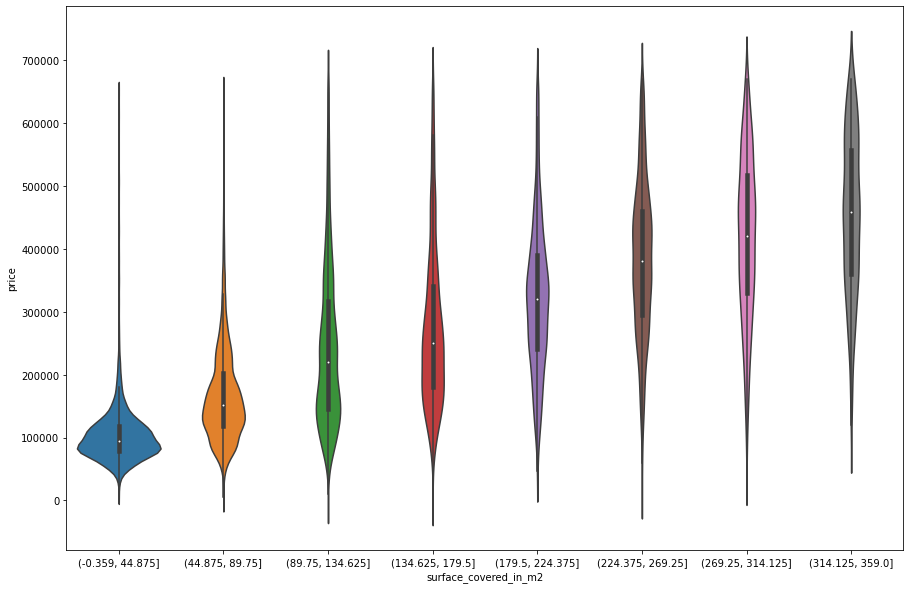

In [315]:
#Analizamos el valor de las propiedadse por rango de metros cuadrados cubiertos
plt.figure(figsize=(15,10))
sns.violinplot(pd.cut(df.surface_covered_in_m2,8),df.price)

In [299]:
#Generamos un df nuevo con menos variables para analizar la relación en un pairplot
df2 = df[["price","property_type","surface_covered_in_m2","rooms"]]

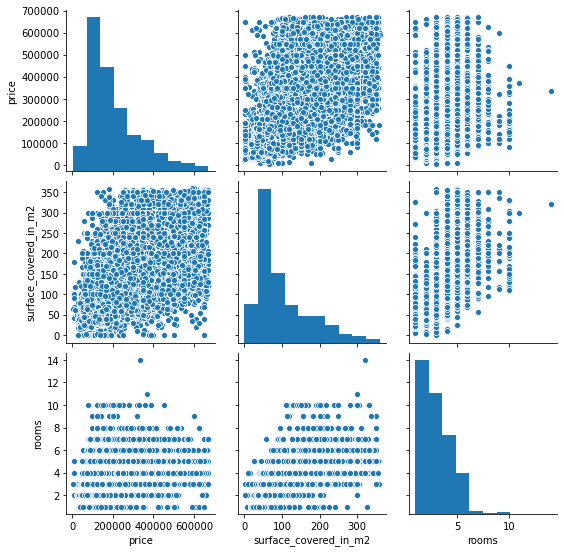

In [300]:
#Analizamos las propiedades del dataset limpio en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
sns.pairplot(df2)

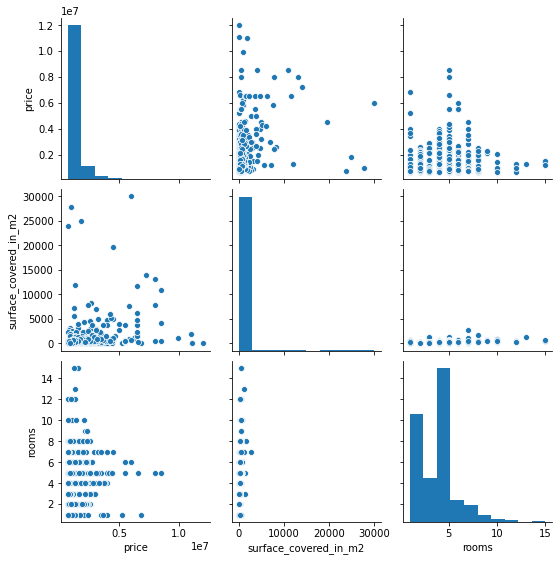

In [302]:
#Analizamos las propiedades más caras en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
df3 = df_high[["price","property_type","surface_covered_in_m2","rooms"]]
sns.pairplot(df3)